<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#NLP-Project:-Email-Analysis-📧🔍" data-toc-modified-id="NLP-Project:-Email-Analysis-📧🔍-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>NLP Project: Email Analysis 📧🔍</a></span><ul class="toc-item"><li><span><a href="#Exploratory-Data-Analysis-(EDA)" data-toc-modified-id="Exploratory-Data-Analysis-(EDA)-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Exploratory Data Analysis (EDA)</a></span></li><li><span><a href="#Data-Preprocessing" data-toc-modified-id="Data-Preprocessing-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Data Preprocessing</a></span></li><li><span><a href="#SPAM-Detection-Model" data-toc-modified-id="SPAM-Detection-Model-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>SPAM Detection Model</a></span><ul class="toc-item"><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Logistic Regression</a></span></li><li><span><a href="#Naive-Bayes" data-toc-modified-id="Naive-Bayes-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Naive Bayes</a></span></li><li><span><a href="#Multilayer-Perceptron-(MLP)" data-toc-modified-id="Multilayer-Perceptron-(MLP)-1.3.3"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>Multilayer Perceptron (MLP)</a></span></li></ul></li><li><span><a href="#Topic-Modelling-of-SPAM-emails" data-toc-modified-id="Topic-Modelling-of-SPAM-emails-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Topic Modelling of SPAM emails</a></span><ul class="toc-item"><li><span><a href="#Distance-between-the-topics" data-toc-modified-id="Distance-between-the-topics-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Distance between the topics</a></span></li></ul></li><li><span><a href="#Extracting-organizations-from-the-non-SPAM-emails" data-toc-modified-id="Extracting-organizations-from-the-non-SPAM-emails-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Extracting organizations from the non-SPAM emails</a></span></li></ul></li></ul></div>

# NLP Project: Email Analysis 📧🔍

## Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd
from utils import *

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gugli\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv('spam_dataset.csv')
df

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\nth...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\n( see a...",0
2,3624,ham,"Subject: neon retreat\nho ho ho , we ' re arou...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\nthis deal is to ...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\nthe transport v...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\nhpl ...,0
5168,2933,ham,Subject: calpine daily gas nomination\n>\n>\nj...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


Let's see how the emails are distributed in the two categories:

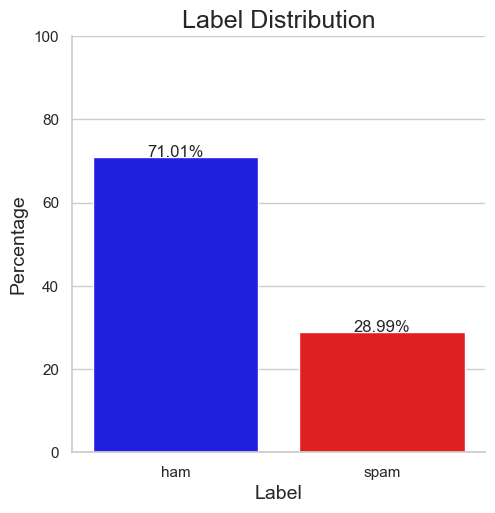

In [3]:
show_barplot('label', df)

All text seem to start with the string `"Subject: "`. This is confirmed by the following code chunk:

In [4]:
non_subject_rows = df[~df['text'].str.startswith("Subject: ")]
non_subject_count = non_subject_rows['text'].count()
print(f"Number of texts that don't start with 'Subject: ': {non_subject_count}")

Number of texts that don't start with 'Subject: ': 0


Therefore, a regular expression will be added to the preprocessing function to remove this string from all the texts.

## Data Preprocessing

A data cleaning function is created, which takes a document as input and performs the following operations:
1. Converts the sentence to lowercase.
2. Removes English **stop words**. Stop words are the words that are most occurring in a text and don’t carry any importance in classification tasks. For example, words like "a", "an", "i", "the", etc.
3. Removes the prefix "Subject:" (if present).
4. Removes punctuation.
5. Removes digits.
6. Tokenizes the sentence using spaCy and lemmatizes each token.
7. Removes extra whitespaces.

**Note**. In order for the data cleaning function to properly work, you need to install in your virtual environment the "en_core_web_sm" pre-trained English pipeline trained on written web text, which is provided by `spacy` library. This can be done through the command `python -m spacy download en_core_web_sm`.

The cleaned corpus is returned by the `clean_data()` function:

In [5]:
df["text_cleaned"] = clean_data(df["text"])

Cleaning data: 100%|█████████████████████████████████████████████████████████| 5171/5171 [05:33<00:00, 15.49document/s]


Let's see the comparison of an email with its cleaned version:

In [6]:
df['text'][0]

"Subject: enron methanol ; meter # : 988291\nthis is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary\nflow data provided by daren } .\nplease override pop ' s daily volume { presently zero } to reflect daily\nactivity you can obtain from gas control .\nthis change is needed asap for economics purposes ."

In [7]:
df["text_cleaned"][0]

'enron methanol meter follow note give monday preliminary flow datum provide daren please override pop daily volume presently zero reflect daily activity obtain gas control change need asap economic purpose'

**Note**. The provided function handles the removal of newline symbols (`\n`) implicitly through the operations it performs. Specifically, the use of `sentence.split()` during the removal of stopwords and the subsequent rejoining with `' '.join()` can remove whitespace, including that generated by newline symbols. An example of this is given by the following code chunk:

In [8]:
sentence = "Hi\nI'm Mattia"
print(sentence.split())
" ".join(sentence.split())

['Hi', "I'm", 'Mattia']


"Hi I'm Mattia"

Before moving to train and evaluate different models for spam detection, let's use the cleaned emails to plot the **word clouds** for both the categories. 

A **word cloud** is a visual representation of a collection of words where the size and font of each word indicates its frequency or importance within the dataset. It is used to give a quick visual overview of the most prominent terms in each category.

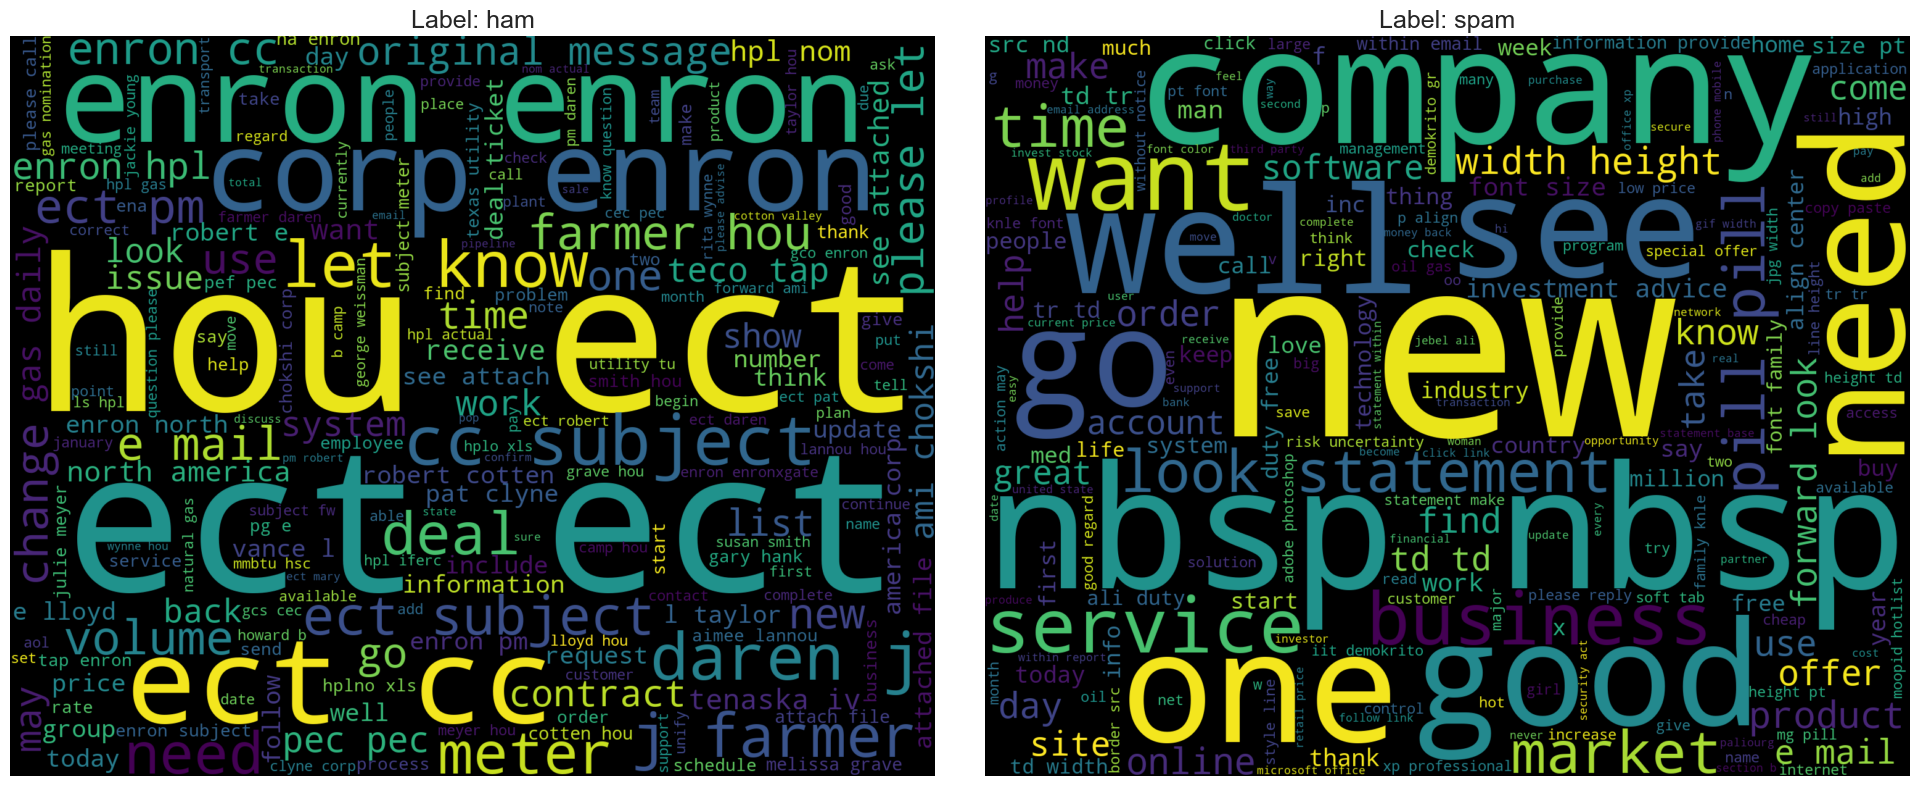

In [9]:
show_wordclouds('label', 'text_cleaned', df)

**Observation**: it seems that there are some words that are repeated. Actually, the reason is that the `WordCloud` class has a parameter, `collocations`, that allows us to decide whether to include collocations (bigrams) of two words. Its default value is `True`, and must be set to `False` in order not to detect collocations, like for example "hou ect" and "ect ect" in the `Label: ham` word cloud.

## SPAM Detection Model

DESCRIZIONE DI TF-IDF, COSÌ CON LA SCUSA LO STUDIO UN PO'.

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = [
     'This is the first document.',
     'This document is the second document.',
     'And this is the third one.',
     'Is this the first document?',
]
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
X.toarray()

array([[0.        , 0.46979139, 0.58028582, 0.38408524, 0.        ,
        0.        , 0.38408524, 0.        , 0.38408524],
       [0.        , 0.6876236 , 0.        , 0.28108867, 0.        ,
        0.53864762, 0.28108867, 0.        , 0.28108867],
       [0.51184851, 0.        , 0.        , 0.26710379, 0.51184851,
        0.        , 0.26710379, 0.51184851, 0.26710379],
       [0.        , 0.46979139, 0.58028582, 0.38408524, 0.        ,
        0.        , 0.38408524, 0.        , 0.38408524]])

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

X = df['text_cleaned'].values
y = df['label_num'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

To perform hyperparameter tuning and choose the best model according to a metric, I used the open source hyperparameter optimization framework called [**Optuna**](https://optuna.org/). In particular, I took the cue from the [`sklearn_additional_args.py` example](https://github.com/optuna/optuna-examples/blob/main/sklearn/sklearn_additional_args.py) available on the GitHub profile of Optuna:

In [28]:
import optuna
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

class Objective():
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __call__(self, trial):
        X, y = self.X, self.y

        tfidf_vectorizer = TfidfVectorizer()
        classifier_name = trial.suggest_categorical("classifier", ["LogisticRegression", "SVC", "RandomForest"])
        if classifier_name == "LogisticRegression":
            lr_class_weight = trial.suggest_categorical("lr_class_weight", [None, "balanced"])
            lr_c = trial.suggest_float("lr_c", 1e-10, 1e10, log=True)
            classifier_obj = LogisticRegression(C=lr_c, class_weight=lr_class_weight)
        elif classifier_name == "SVC":
            svc_class_weight = trial.suggest_categorical("svc_class_weight", [None, "balanced"])
            svc_c = trial.suggest_float("svc_c", 1e-10, 1e10, log=True)
            classifier_obj = SVC(C=svc_c, class_weight=svc_class_weight)
        else:
            rf_max_depth = trial.suggest_int("rf_max_depth", 2, 32, log=True)
            classifier_obj = RandomForestClassifier(
                max_depth=rf_max_depth, n_estimators=10
            )
        
        pipeline = Pipeline([
            ('tfidf', tfidf_vectorizer),
            ('model', classifier_obj)
        ])
        
        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
        accuracy_scores = np.empty(5)

        for i, (train_index, val_index) in enumerate(cv.split(X, y)):
            X_train, X_val = X[train_index], X[val_index]
            y_train, y_val = y[train_index], y[val_index]

            accuracy_scores[i] = pipeline.fit(X_train, y_train).score(X_val, y_val)
        
        print(accuracy_scores)
        accuracy = accuracy_scores.mean()
        return accuracy

In [29]:
X = X_train
y = y_train
objective = Objective(X, y)
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20)
print(study.best_trial)

[I 2024-01-27 22:45:18,600] A new study created in memory with name: no-name-57745d74-26d1-4480-85eb-381832519b36
[I 2024-01-27 22:46:19,483] Trial 0 finished with value: 0.710106373657186 and parameters: {'classifier': 'SVC', 'svc_class_weight': None, 'svc_c': 6.942673002540735e-07}. Best is trial 0 with value: 0.710106373657186.


[0.71014493 0.71100363 0.70979444 0.70979444 0.70979444]


[I 2024-01-27 22:46:25,606] Trial 1 finished with value: 0.8936152439701148 and parameters: {'classifier': 'RandomForest', 'rf_max_depth': 27}. Best is trial 1 with value: 0.8936152439701148.


[0.90096618 0.88633615 0.89600967 0.90205562 0.88270859]


[I 2024-01-27 22:47:36,580] Trial 2 finished with value: 0.9862196169146381 and parameters: {'classifier': 'SVC', 'svc_class_weight': 'balanced', 'svc_c': 19.294106821705945}. Best is trial 2 with value: 0.9862196169146381.


[0.98188406 0.98428053 0.99032648 0.9879081  0.98669891]


[I 2024-01-27 22:48:34,102] Trial 3 finished with value: 0.9775143262709637 and parameters: {'classifier': 'SVC', 'svc_class_weight': 'balanced', 'svc_c': 0.7519232438595546}. Best is trial 2 with value: 0.9862196169146381.


[0.97826087 0.98065296 0.97339782 0.98065296 0.97460701]


[I 2024-01-27 22:48:39,735] Trial 4 finished with value: 0.8341368312216322 and parameters: {'classifier': 'RandomForest', 'rf_max_depth': 16}. Best is trial 2 with value: 0.9862196169146381.


[0.8442029  0.82708585 0.83555018 0.83192261 0.83192261]


[I 2024-01-27 22:48:45,553] Trial 5 finished with value: 0.8737921244939804 and parameters: {'classifier': 'RandomForest', 'rf_max_depth': 21}. Best is trial 2 with value: 0.9862196169146381.


[0.86956522 0.8694075  0.88270859 0.87908102 0.86819831]


[I 2024-01-27 22:48:51,418] Trial 6 finished with value: 0.984285205240991 and parameters: {'classifier': 'LogisticRegression', 'lr_class_weight': None, 'lr_c': 51236.19821724966}. Best is trial 2 with value: 0.9862196169146381.


[0.98067633 0.98186215 0.98911729 0.98548972 0.98428053]


[I 2024-01-27 22:48:56,532] Trial 7 finished with value: 0.755079473564306 and parameters: {'classifier': 'RandomForest', 'rf_max_depth': 6}. Best is trial 2 with value: 0.9862196169146381.


[0.74637681 0.74848851 0.78234583 0.75211608 0.74607013]


[I 2024-01-27 22:49:01,153] Trial 8 finished with value: 0.9564790962036112 and parameters: {'classifier': 'LogisticRegression', 'lr_class_weight': 'balanced', 'lr_c': 7.116205302140705e-07}. Best is trial 2 with value: 0.9862196169146381.


[0.9589372  0.9528416  0.9637243  0.96009674 0.94679565]


[I 2024-01-27 22:49:07,072] Trial 9 finished with value: 0.8360776685417871 and parameters: {'classifier': 'RandomForest', 'rf_max_depth': 16}. Best is trial 2 with value: 0.9862196169146381.


[0.81884058 0.8210399  0.86215236 0.8452237  0.8331318 ]


[I 2024-01-27 22:50:16,780] Trial 10 finished with value: 0.9862196169146381 and parameters: {'classifier': 'SVC', 'svc_class_weight': 'balanced', 'svc_c': 99958388.28604487}. Best is trial 2 with value: 0.9862196169146381.


[0.98188406 0.98428053 0.99032648 0.9879081  0.98669891]


[I 2024-01-27 22:51:28,742] Trial 11 finished with value: 0.9862196169146381 and parameters: {'classifier': 'SVC', 'svc_class_weight': 'balanced', 'svc_c': 7601985664.810579}. Best is trial 2 with value: 0.9862196169146381.


[0.98188406 0.98428053 0.99032648 0.9879081  0.98669891]


[I 2024-01-27 22:52:40,135] Trial 12 finished with value: 0.9862196169146381 and parameters: {'classifier': 'SVC', 'svc_class_weight': 'balanced', 'svc_c': 214994324.17267665}. Best is trial 2 with value: 0.9862196169146381.


[0.98188406 0.98428053 0.99032648 0.9879081  0.98669891]


[W 2024-01-27 22:53:20,782] Trial 13 failed with parameters: {'classifier': 'SVC', 'svc_class_weight': 'balanced', 'svc_c': 535.6241472628484} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "C:\Users\gugli\Desktop\venv\spam_venv\lib\site-packages\optuna\study\_optimize.py", line 200, in _run_trial
    value_or_values = func(trial)
  File "C:\Users\gugli\AppData\Local\Temp\ipykernel_31780\3550572584.py", line 45, in __call__
    accuracy_scores[i] = pipeline.fit(X_train, y_train).score(X_val, y_val)
  File "C:\Users\gugli\Desktop\venv\spam_venv\lib\site-packages\sklearn\base.py", line 1351, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\gugli\Desktop\venv\spam_venv\lib\site-packages\sklearn\pipeline.py", line 475, in fit
    self._final_estimator.fit(Xt, y, **last_step_params["fit"])
  File "C:\Users\gugli\Desktop\venv\spam_venv\lib\site-packages\sklearn\base.py", line 1351, in wrapper
    return fit_method(e

KeyboardInterrupt: 

**ESEMPIO DA BASE DA CANCELLARE NELLA VERSIONE FINALE**:

In [54]:
model = LogisticRegression()

X = X_train
y = y_train

tfidf_vectorizer = TfidfVectorizer()

pipeline = Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('model', model)
])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

for train_index, val_index in cv.split(X, y):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    X_train_transformed = pipeline.named_steps['tfidf'].fit_transform(X_train)
    X_val_transformed = pipeline.named_steps['tfidf'].transform(X_val)

    pipeline.named_steps['model'].fit(X_train_transformed, y_train)
    
    print("FIRST METHOD:")
    print(pipeline.named_steps['model'].score(X_val_transformed, y_val))
    print("---------------------------------------------")
    # CONFRONTARE QUESTO FUNZIONAMENTO CON QUEST'ALTRO, DOVREBBERO DARE LO STESSO RISULTATO
    # SONO UGUALI, QUINDI CONSIDERARE SOLAMENTE QUESTO IN BASSO!
    print("SECOND METHOD:")
    print(pipeline.fit(X_train, y_train).score(X_val, y_val))
    print("--------------------------------------------")
    print("THIRD METHOD:")
    pipeline.fit(X_train, y_train)
    y_val_pred = pipeline.predict(X_val)
    print(accuracy_score(y_val, y_val_pred))
    print("--------------------------------------------")
    print("\n")

# Oltre alla cross-validation, puoi ora utilizzare la pipeline addestrata per fare previsioni su nuovi dati

FIRST METHOD:
0.9818840579710145
---------------------------------------------
SECOND METHOD:
0.9818840579710145
--------------------------------------------
THIRD METHOD:
0.9818840579710145
--------------------------------------------


FIRST METHOD:
0.9818621523579202
---------------------------------------------
SECOND METHOD:
0.9818621523579202
--------------------------------------------
THIRD METHOD:
0.9818621523579202
--------------------------------------------


FIRST METHOD:
0.9830713422007256
---------------------------------------------
SECOND METHOD:
0.9830713422007256
--------------------------------------------
THIRD METHOD:
0.9830713422007256
--------------------------------------------


FIRST METHOD:
0.9842805320435308
---------------------------------------------
SECOND METHOD:
0.9842805320435308
--------------------------------------------
THIRD METHOD:
0.9842805320435308
--------------------------------------------


FIRST METHOD:
0.9818621523579202
---------------

### Logistic Regression

### Naive Bayes

### Multilayer Perceptron (MLP)

"Multilayer Perceptron" or "MLP" refers to a neural network with multiple layers, including input, hidden, and output layers.

In [ ]:
from sklearn.neural_network import MLPClassifier

Innanzitutto, per attività di classificazione testuale, dallo state-of-art (stato dell'arte), si è visto che la funzione di attivazione generalmente più utilizzata è la `logistic`. Il solver più utilizzato per questo tipo di task è l'`adam`. Settiamo il numero di iterazioni massime eseguite per la fase di training a 100, il numero di hidden layer a 1, e mettiamo come size 100. Ovviamente, per migliorare le prestazioni, il tutto dovrà essere fatto in un ciclo che step by step va a verificare qual è la best size e il miglior numero di hidden layer che ben si adattano a questo tipo di task.

Come `tol`, che indicherà alla rete di terminare il training qualora per 10 volte successive non si supera questa soglia, quindi l'accuracy resta al di sotto della soglia che stiamo per impostare. Detto meglio, se per 10 volte successive la differenza tra il valore della funzione loss dell'iterazione precedente e quella corrente rimane al di sotto della tolerance, il training viene arrestato. Dalla documentazione:
```
Tolerance for the optimization. When the loss or score is not improving by at least tol for n_iter_no_change consecutive iterations, unless learning_rate is set to ‘adaptive’, convergence is considered to be reached and training stops.
```

Il valore di default di `n_iter_no_change` è 10, mentre quello del learning rate è `constant`.

Inoltre, impostiamo `verbose=True` in modo da visualizzare la fase di training del modello:

In [ ]:
clf = MLPClassifier(activation='logistic', 
                    solver='adam', 
                    max_iter=100, 
                    hidden_layer_sizes=(100,), 
                    tol=0.005, 
                    verbose=True)

In [10]:
clf.fit(training_data_cleaned, dataset_training['target'])

NameError: name 'clf' is not defined

In [ ]:
clf.score(testing_data_cleaned, dataset_testing['target'])

## Topic Modelling of SPAM emails

### Distance between the topics

## Extracting organizations from the non-SPAM emails